Preamble: Import Libraries, Download Dataset, Preprocess Data

In [19]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # sometimes needed to register 3D
import numpy as np
from matplotlib import colors
from matplotlib.widgets import Slider
import matplotlib
import matplotlib.font_manager




from medmnist import OrganMNIST3D

In [12]:


# Or NoduleMNIST3D, AdrenalMNIST3D, etc.
# Change these to match which dataset you've been assigned


train_dataset = OrganMNIST3D(split='train', size=28, download=True)
trainx = []
trainy = []

test_dataset = OrganMNIST3D(split='test', size=28, download=True)
testx = []
testy = []

val_dataset = OrganMNIST3D(split='train', size=28, download=True)
valx = []
valy = []

for i in range(len(train_dataset)):
    trainx.append(train_dataset[i][0])
    trainy.append(train_dataset[i][1])

for i in range(len(test_dataset)):
    testx.append(test_dataset[i][0])
    testy.append(test_dataset[i][1])

for i in range(len(val_dataset)):
    valx.append(val_dataset[i][0])
    valy.append(val_dataset[i][1])

trainx_tensor = tf.convert_to_tensor(trainx, dtype=tf.float16)
trainy_tensor = tf.convert_to_tensor(trainy, dtype=tf.float16)
testx_tensor = tf.convert_to_tensor(testx, dtype=tf.float16)
testy_tensor = tf.convert_to_tensor(testy, dtype=tf.float16)
valx_tensor = tf.convert_to_tensor(valx, dtype=tf.float16)
valy_tensor = tf.convert_to_tensor(valy, dtype=tf.float16)
# float16 doesn't run any faster on the 4090s, but it cuts memory usage in half!





Preamble: Understand and Visualize Data

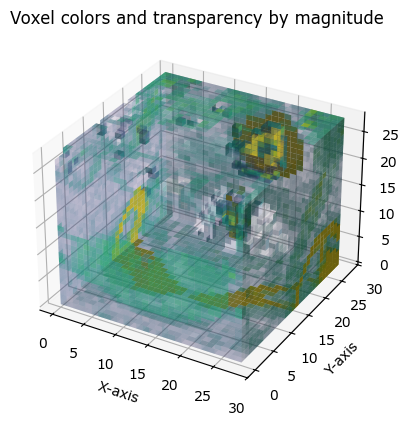

In [13]:
fig = plt.figure()

vol = np.squeeze(trainx[1], axis=0)     # shape (28, 28, 28)

ax = fig.add_subplot(111, projection='3d')

filled = vol > 0

# Create RGBA array
norm = colors.Normalize(vmin=vol.min(), vmax=vol.max())

# Pick a colormap: 'viridis', 'plasma', 'inferno', 'magma', etc.
cmap = plt.cm.viridis

# cmap(norm(vol)) gives an RGBA array of shape (28, 28, 28, 4)
facecolors = cmap(norm(vol))

# --- Use magnitude as alpha (0 → transparent, 1 → opaque) ---
# If vol is already in [0, 1], clip is fine; otherwise you can reuse norm(vol)
alpha = np.clip(vol, 0, 1)
facecolors[..., 3] = alpha

# Optionally: make truly empty voxels fully transparent (even if they exist in facecolors)
facecolors[~filled, 3] = 0.0

# --- Plot ---
ax.voxels(filled, facecolors=facecolors)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('Voxel colors and transparency by magnitude')
plt.show()

In [23]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans']
matplotlib.rcParams['font.family'] = 'sans-serif'


In [27]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

# Font settings
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'Verdana']

# Get a sample volume and squeeze out any extra dimensions
vol = np.array(trainx[0]).squeeze()  # Remove dimensions of size 1
print(f"Volume shape after squeeze: {vol.shape}")

# Initial slice index
init_idx = vol.shape[0] // 2

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

# Show initial slice
im = ax.imshow(vol[init_idx], cmap='gray')
ax.set_title(f"Slice {init_idx}")
ax.axis('off')

# Slider axis
ax_slider = fig.add_axes([0.2, 0.05, 0.6, 0.03])

# Slider
slider = Slider(
    ax=ax_slider,
    label='Slice',
    valmin=0,
    valmax=vol.shape[0] - 1,
    valinit=init_idx,
    valstep=1,
)

# Update function
def update(val):
    idx = int(slider.val)
    im.set_data(vol[idx])
    ax.set_title(f"Slice {idx}")
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.


Volume shape after squeeze: (28, 28, 28)


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0, and fallback to the default font was disabled

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0, and fallback to the default font was disabled

<Figure size 640x480 with 2 Axes>

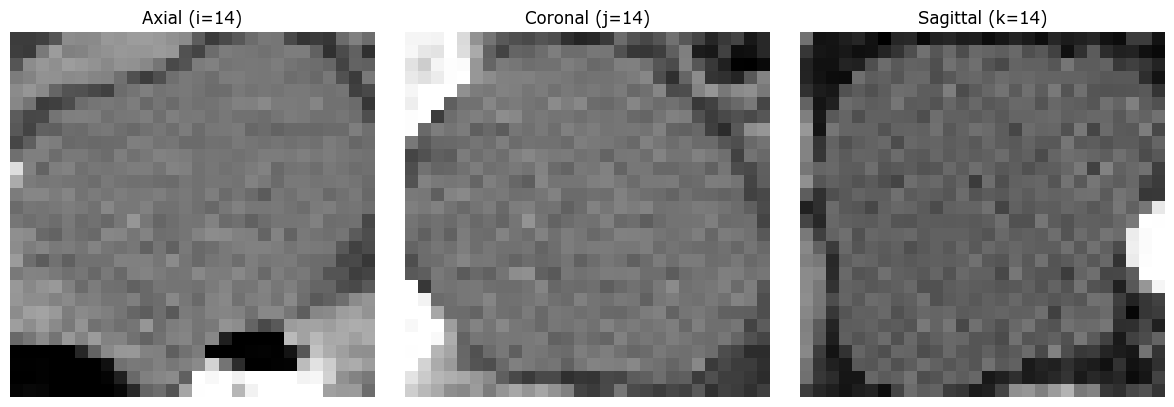

In [15]:
# Middle indices along each axis
i_mid = vol.shape[0] // 2  # axial index
j_mid = vol.shape[1] // 2  # coronal index
k_mid = vol.shape[2] // 2  # sagittal index

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Axial: slice along axis 0
axes[0].imshow(vol[i_mid, :, :], cmap='gray')
axes[0].set_title(f'Axial (i={i_mid})')
axes[0].axis('off')

# Coronal: slice along axis 1
axes[1].imshow(vol[:, j_mid, :], cmap='gray')
axes[1].set_title(f'Coronal (j={j_mid})')
axes[1].axis('off')

# Sagittal: slice along axis 2
axes[2].imshow(vol[:, :, k_mid], cmap='gray')
axes[2].set_title(f'Sagittal (k={k_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

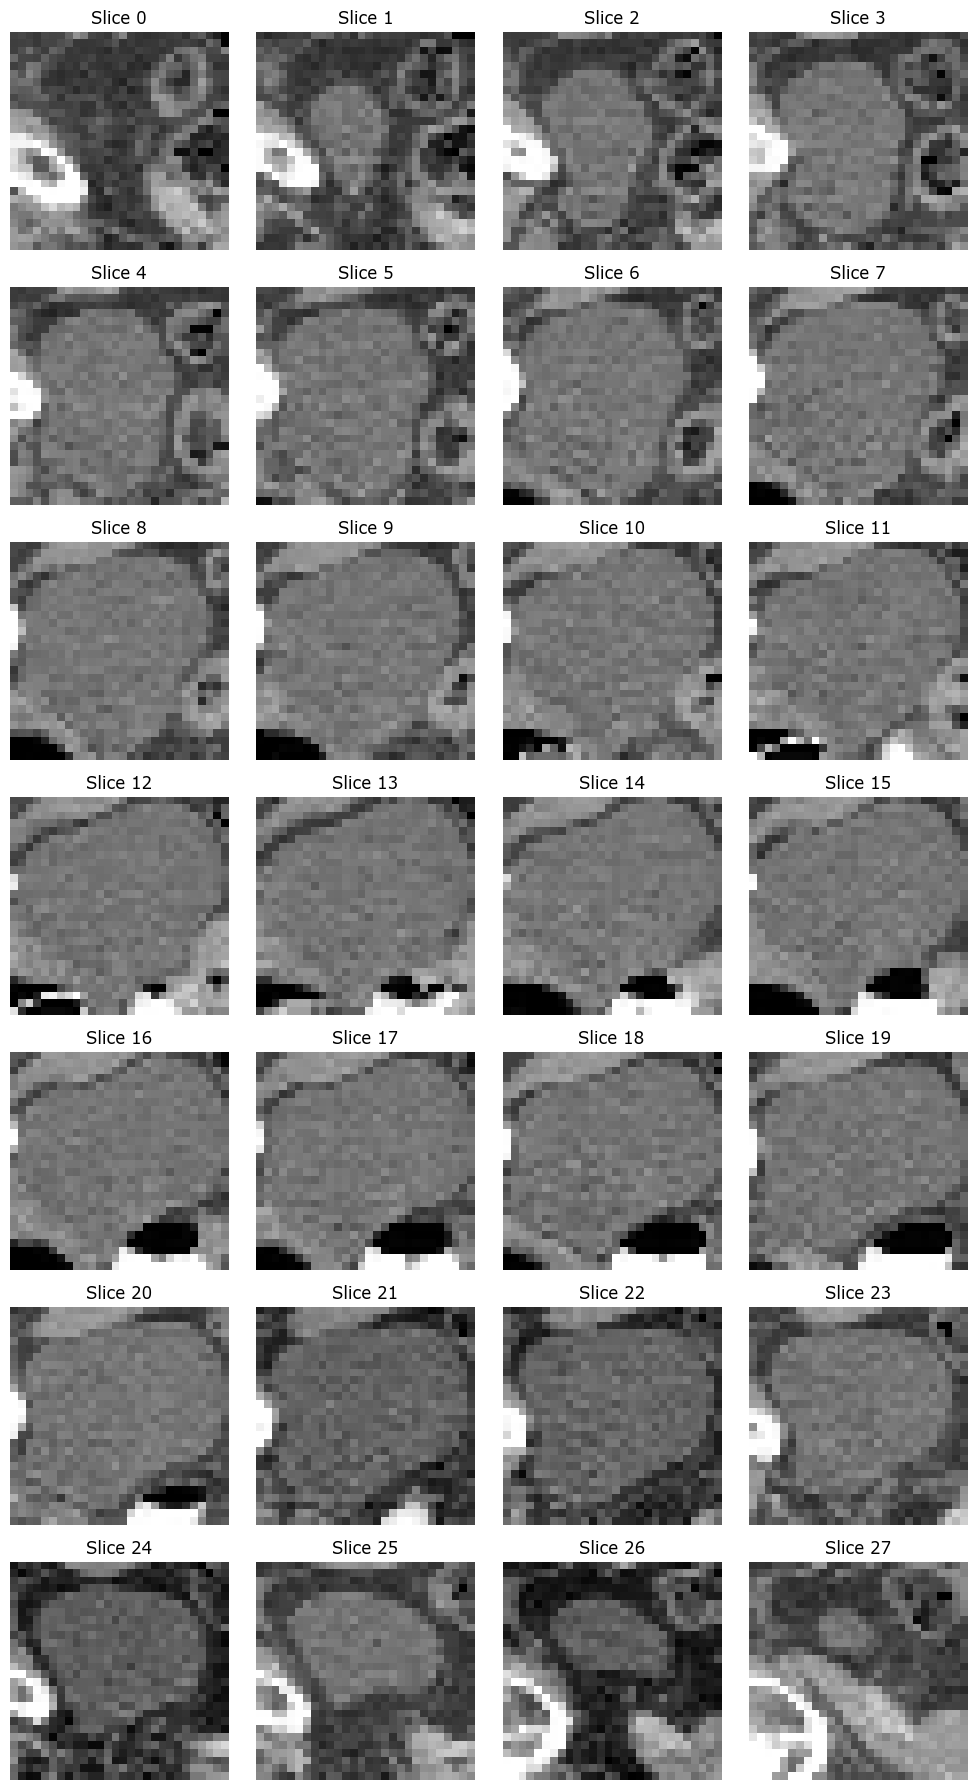

In [10]:
num_slices = vol.shape[0]
rows, cols = 7, 4

fig, axes = plt.subplots(rows, cols, figsize=(10, 18))

for i, ax in enumerate(axes.flat):
    if i < num_slices:
        ax.imshow(vol[i], cmap='gray')
        ax.set_title(f"Slice {i}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()